In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns

In [2]:
df = pd.read_csv("covid19_tweets.csv")
newdf = df.copy()
newdf = newdf.drop(['user_name','user_location','user_description','user_created','user_verified','date','text','hashtags','source','is_retweet'], axis=1)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [3]:
import re
def clean_1(s):
    s = s.replace('ðŸž', "")
    s = s.replace('ðŸ¤·â€â™', "")
    s = s.replace("ðŸ”´", "")
    s = s.replace("€™", "")
    s = s.replace("ƒ¼", "")
    s = s.replace("â€˜", "")
    s = s.replace("â€™", "")
    s = s.replace("ðŸ˜˜", "")
    s = s.replace("ðŸ”Š", "")
    s = s.replace("&amp;", "&")
    s = s.replace("ðŸ§©", "")
    s = s.replace(":", "")
    s = s.replace(";", "")
    s = s.replace("'", "")
    s = s.replace("|", "")
    s = s.replace("//", "")
    s = s.replace('📍',"")
    s = s.replace('🏫',"")
    s = s.replace('💯',"")
    s = s.replace('🧵',"")
    s = s.replace('🔊',"")
    s = s.replace("●", "")
    s = s.replace("❤️", "")
    s = s.replace("🙃", "")
    s = s.replace("🤔", "")
    s = s.replace("😉", "")
    s = s.replace("⬇️", "")
    s = s.replace("🔴", "")
    s = s.replace("🤷‍", "")
    s = s.replace("🐞", "")
    s = s.replace("🚨", "")
    s = s.replace("🙌", "")
    s = s.replace("👑", "")
    s = s.replace("🔥", "")
    s = s.replace("👇", "")
    s = s.replace("👀", "")
    s = s.replace("/", "")
    s = s.replace("-", "")
    s = s.replace("\n", "")
    s = s.replace("https", "")
    s = s.replace("Covid19","COVID19")
    s = s.replace("covid19","COVID19")
    s = s.replace("coronavirus","COVID19")
    return str(s)


In [4]:
def clean_2(s):
    s = str(s).upper()
    s = s.replace("[", "")
    s = s.replace("]", "")
    s = s.replace("'", "")
    s = s.replace("CORONAVIRUS","COVID19")
    s = s.replace("CORONAVIRUS, COVID19","COVID19")
    s = s.replace("COVID19, COVID19","COVID19")
    
    return str(s).upper()

In [5]:
df["text_clean"] = ''
df["hashtags_clean"] = ''

In [6]:
for i, row in df.iterrows():
    df.at[i, "text_clean"] = clean_1(row.text)
    df.at[i, "hashtags_clean"] = clean_2(row.hashtags)

In [7]:
import spacy
nlp = spacy.load('en_core_web_sm')
for i, row in df.iterrows():
    if i % 1000 == 0:
        print(i)
    if(row["text_clean"] and len(str(row["text_clean"])) < 1000000):
        doc = nlp(str(row["text_clean"]))
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []

        for token in doc:
            lemmas.append(token.lemma_)
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
                
        df.at[i, "selftext_lemma"] = " ".join(lemmas)                
        df.at[i, "selftext_nouns"] = " ".join(nouns)
        df.at[i, "selftext_adjectives"] = " ".join(adjectives)
        df.at[i, "selftext_verbs"] = " ".join(verbs)
        df.at[i, "selftext_nav"] = " ".join(nouns+adjectives+verbs)
        df.at[i, "no_tokens"] = len(lemmas)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000


In [8]:
df['hashtags_clean'].nunique()

21669

In [9]:
# group by category, count distinct subreddits and posts
cat_df = df.groupby('hashtags_clean') \
           .agg({'user_location': pd.Series.nunique,
                 'user_name': pd.Series.count}) \
           .rename(columns={'user_location': 'num_locations',
                            'user_name': 'num_posts'}) \
           .sort_values('num_posts', ascending=False)
            
# show top 5 records
cat_df.head(5)

,num_locations,num_posts
hashtags_clean,,
NAN,5847,21434
COVID19,5785,20747
"COVID19UPDATE, COVID19PANDEMIC",0,181
"COVID19UPDATES, COVID19",43,163
"INDIAFIGHTSCORONA, COVID19",35,113


In [10]:
cat_df.describe()

,num_locations,num_posts
count,21669.000000,21669.000000
mean,1.581891,3.435138
std,55.889327,202.654735
min,0.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,5847.000000,21434.000000


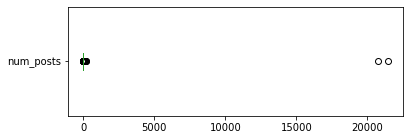

In [11]:
cat_df[['num_posts']].plot(kind='box', vert=False, figsize=(6, 2));

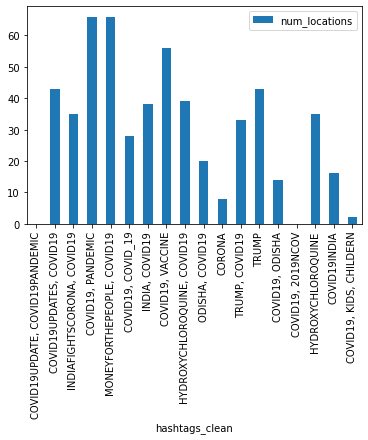

In [12]:
cat_df[['num_locations']][2:20].plot(kind='bar');

In [13]:
# create a data frame slice
sub_df = df[df['hashtags_clean']=='COVID19']

# sample cleaned text and tokens tagged as nouns
sub_df[['text_clean', 'selftext_nouns']].sample(2)

,text_clean,selftext_nouns
43128,So its safe enough to open schools and send fo...,school work # election t.colHJpbY78Pg
37897,Watch ER Doctor ‘We Are Not Overwhelming the ...,ER doctor Health Care System Lies # covid19 t....


In [14]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [15]:
tokens = sub_df.selftext_nouns.map(my_tokenizer).sum()

In [16]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('covid19', 14239),
 ('#', 8450),
 ('COVID19', 5501),
 ('case', 3424),
 ('death', 1535),
 ('people', 1149),
 ('number', 689),
 ('day', 683),
 ('%', 637),
 ('today', 614),
 ('Coronavirus', 609),
 ('test', 607),
 ('pandemic', 590),
 ('country', 542),
 ('mask', 541),
 ('spread', 508),
 ('India', 493),
 ('time', 484),
 ('state', 449),
 ('risk', 444)]

In [17]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

# rebuild counter
counter = Counter(remove_stopwords(tokens))

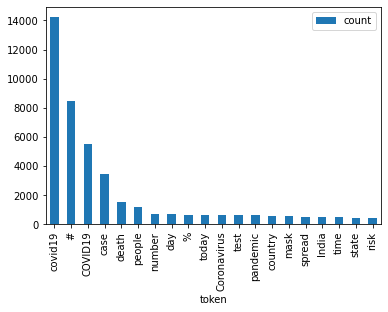

In [18]:

# convert list of tuples into data frame
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df.plot(kind='bar', x='token');

In [19]:
from wordcloud import WordCloud

def wordcloud(counter):
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

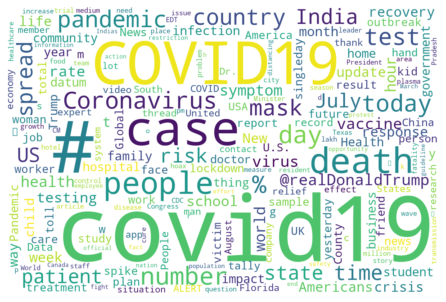

In [20]:
wordcloud(counter)

In [21]:
df['no_tokens'] = df.selftext_lemma\
  .map(lambda l: 0 if l==None else len(l.split()))

<AxesSubplot:xlabel='hashtags_clean'>

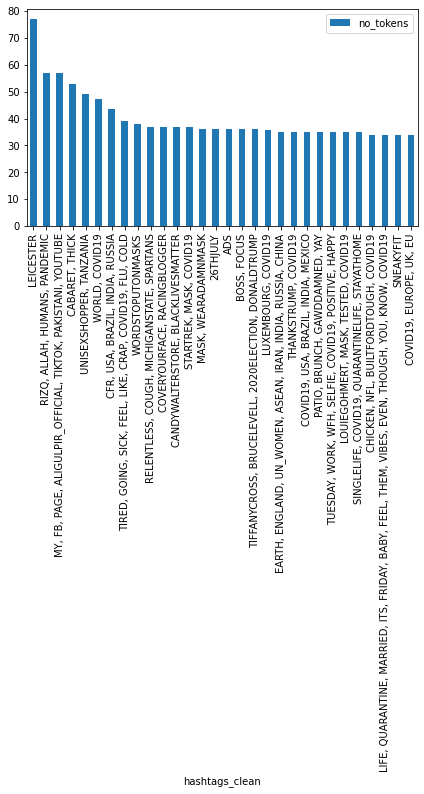

In [22]:
# mean number of tokens by category
prueba = df.groupby(['hashtags_clean']) \
  .agg({'no_tokens':'mean'}) \
  .sort_values(by='no_tokens', ascending=False);
prueba[:30].plot(kind='bar', figsize=(7,4))

In [25]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,source,is_retweet,text_clean,hashtags_clean,selftext_lemma,selftext_nouns,selftext_adjectives,selftext_verbs,selftext_nav,no_tokens
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,...,Twitter for iPhone,False,If I smelled the scent of hand sanitizers toda...,NAN,if -PRON- smell the scent of hand sanitizer to...,scent hand sanitizer today past,intoxicated,smell would think,scent hand sanitizer today past intoxicated sm...,25
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,...,Twitter for Android,False,Hey @Yankees @YankeesPR and @MLB wouldnt it h...,NAN,hey @Yankees @YankeesPR and @MLB would not -...,@Yankees @YankeesPR @MLB sense player respect ...,more,would make pay,@Yankees @YankeesPR @MLB sense player respect ...,24
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,...,Twitter for Android,False,@diane3443 @wdunlap @realDonaldTrump Trump nev...,COVID19,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@realDonaldTrump Trump # COVID19 hoax effort t...,,claim claim,@realDonaldTrump Trump # COVID19 hoax effort t...,22
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,...,Twitter for iPhone,False,@brookbanktv The one gift #COVID19 has give me...,COVID19,@brookbanktv the one gift # covid19 have give ...,gift # covid19 appreciation thing t.coZ0pOAlFXcW,simple,give,gift # covid19 appreciation thing t.coZ0pOAlFX...,23
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,...,Twitter for Android,False,25 July Media Bulletin on Novel #CoronaVirusU...,"COVID19UPDATES, COVID19",25 July Media Bulletin on Novel # coronaviru...,July Media Bulletin Novel # covid19 @kansalroh...,,coronavirusupdate,July Media Bulletin Novel # covid19 @kansalroh...,16


In [30]:
df.describe()

,user_followers,user_friends,user_favourites,no_tokens
count,7.443600e+04,74436.000000,7.443600e+04,74436.000000
mean,1.059513e+05,2154.721170,1.529747e+04,21.571726
std,8.222900e+05,9365.587474,4.668971e+04,4.745060
min,0.000000e+00,0.000000,0.000000e+00,2.000000
25%,1.660000e+02,153.000000,2.200000e+02,19.000000
50%,9.600000e+02,552.000000,1.927000e+03,22.000000
75%,5.148000e+03,1780.250000,1.014800e+04,25.000000
max,1.389284e+07,497363.000000,2.047197e+06,77.000000


In [31]:
df.describe(include=np.object).transpose()

,count,unique,top,freq
user_name,74436,44853,GlobalPandemic.NET,312
user_location,59218,14622,India,1496
date,74436,56546,2020-07-29 16:30:00,26
hashtags,53002,23445,['COVID19'],16004
source,74424,450,Twitter Web App,22974
text_clean,74436,74312,Greenland has no active cases of the novel COV...,6
hashtags_clean,74436,21669,NAN,21434
selftext_lemma,74436,74311,Greenland have no active case of the novel COV...,6
selftext_nouns,74436,71917,spread covid19 risk case symptom y,105
selftext_adjectives,74436,23860,,22426


In [32]:
print(df.corr(method='pearson'))

                 user_followers  user_friends  user_favourites  no_tokens
user_followers         1.000000     -0.002722        -0.028724  -0.038994
user_friends          -0.002722      1.000000         0.207825  -0.022516
user_favourites       -0.028724      0.207825         1.000000  -0.017033
no_tokens             -0.038994     -0.022516        -0.017033   1.000000


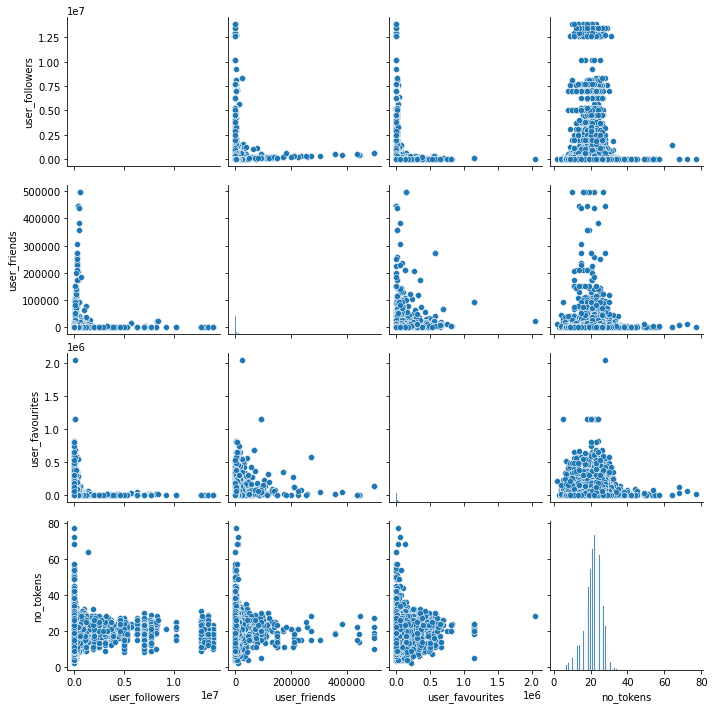

In [33]:
sns.pairplot(df)
plt.show()

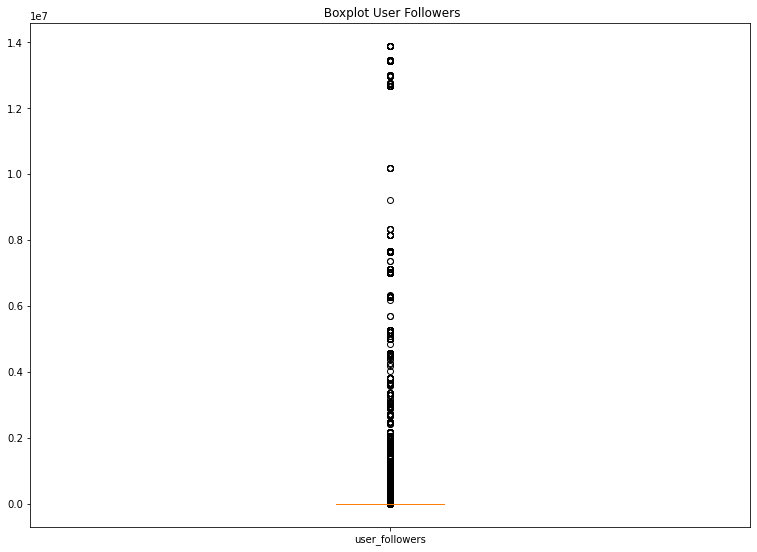

In [34]:
columna_1 = df["user_followers"]
myData = [columna_1]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(myData) 
plt.title(" Boxplot User Followers") 
ax.set_xticklabels(['user_followers'])
plt.show()

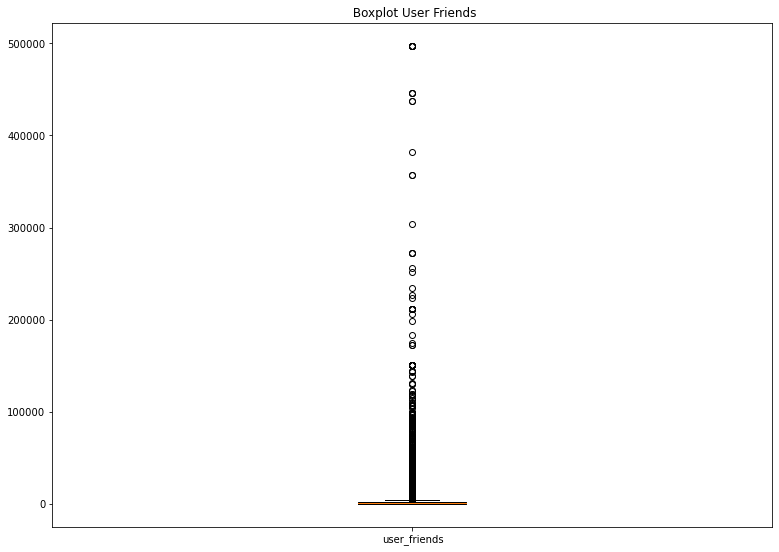

In [35]:
columna_2 = df["user_friends"]
myData = [columna_2]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(myData) 
plt.title(" Boxplot User Friends") 
ax.set_xticklabels(['user_friends'])
plt.show()

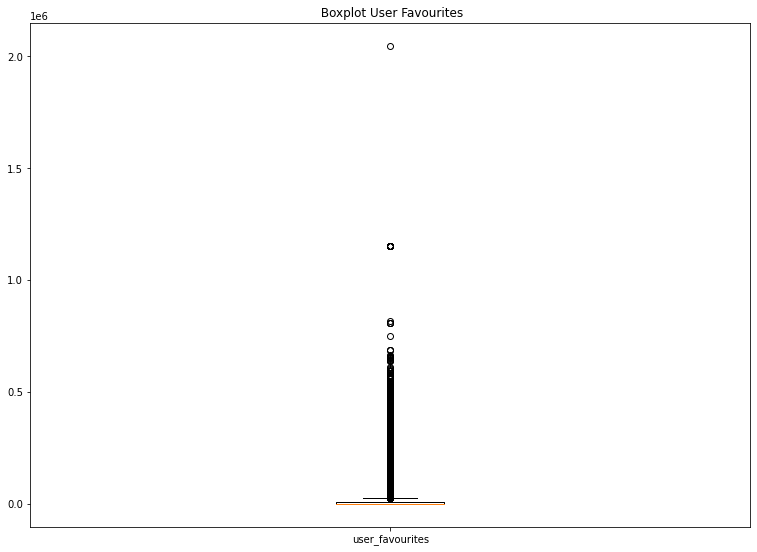

In [36]:
columna_3 = df["user_favourites"]
myData = [columna_3]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(myData) 
plt.title(" Boxplot User Favourites") 
ax.set_xticklabels(['user_favourites'])
plt.show()

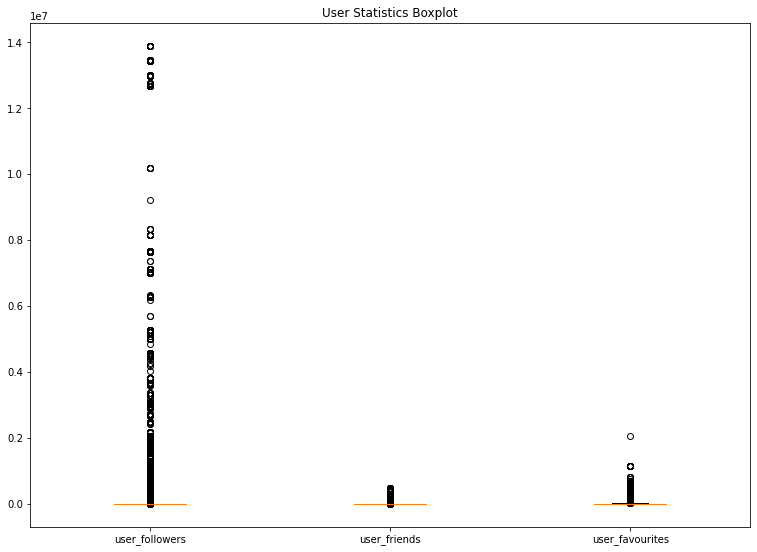

In [37]:
#Boxplot general
columna_1 = df["user_followers"]
columna_2 = df["user_friends"]
columna_3 = df["user_favourites"]
myData = [columna_1,columna_2,columna_3]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(myData) 
plt.title("User Statistics Boxplot") 
ax.set_xticklabels(['user_followers', 'user_friends',  
                    'user_favourites']) 

plt.show()

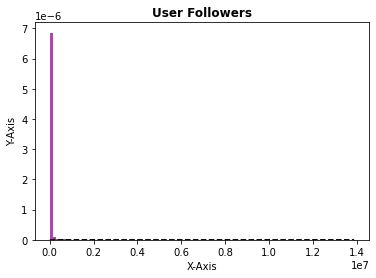

In [38]:
#Histograma user_followers
np.random.seed(10**7) 
mu = 121 
sigma = 21
x = mu + sigma * np.random.randn(1000) 
   
num_bins = 100
   
n, bins, patches = plt.hist(df["user_followers"], num_bins,  
                            density = 1,  
                            color ='purple', 
                            alpha = 0.7) 
   
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) 
  
plt.plot(bins, y, '--', color ='black') 
  
plt.xlabel('X-Axis') 
plt.ylabel('Y-Axis') 
  
plt.title('User Followers', 
          fontweight ="bold") 
  
plt.show()

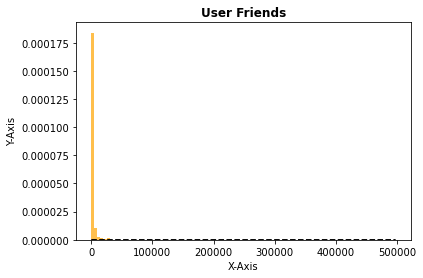

In [39]:
#Histograma user_friends
np.random.seed(10**7) 
mu = 121 
sigma = 21
x = mu + sigma * np.random.randn(1000) 
   
num_bins = 100
   
n, bins, patches = plt.hist(df["user_friends"], num_bins,  
                            density = 1,  
                            color ='orange', 
                            alpha = 0.7) 
   
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) 
  
plt.plot(bins, y, '--', color ='black') 
  
plt.xlabel('X-Axis') 
plt.ylabel('Y-Axis') 
  
plt.title('User Friends', 
          fontweight ="bold") 
  
plt.show() 

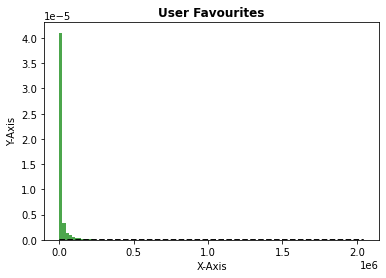

In [40]:
#Histograma user_favourites
np.random.seed(10**7) 
mu = 121 
sigma = 21
x = mu + sigma * np.random.randn(1000) 
   
num_bins = 100
   
n, bins, patches = plt.hist(df["user_favourites"], num_bins,  
                            density = 1,  
                            color ='green', 
                            alpha = 0.7) 
   
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) 
  
plt.plot(bins, y, '--', color ='black') 
  
plt.xlabel('X-Axis') 
plt.ylabel('Y-Axis') 
  
plt.title('User Favourites', 
          fontweight ="bold") 
  
plt.show()